In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = load_wine()
X = data.data        # Features
y = data.target      # Labels

# Normalize features using StandardScaler (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the KNN classifier with a default k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9629629629629629
Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


In [3]:
k_values = [1, 3, 5, 7, 9, 11]
from sklearn.metrics import classification_report

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n--- K = {k} ---")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))



--- K = 1 ---
Accuracy: 0.9629629629629629
Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- K = 3 ---
Accuracy: 0.9629629629629629
Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96  

Accuracy: 0.9629629629629629
Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


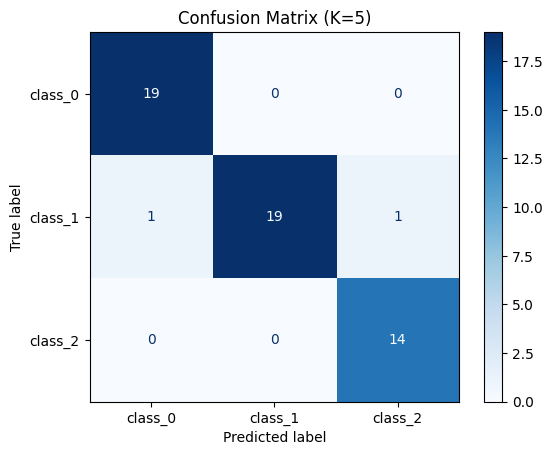

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Optional: Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (K=5)")
plt.show()


<ipython-input-5-5f8c41afcb5b>:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_points, edgecolor='k', marker='x', s=100, label='Test')


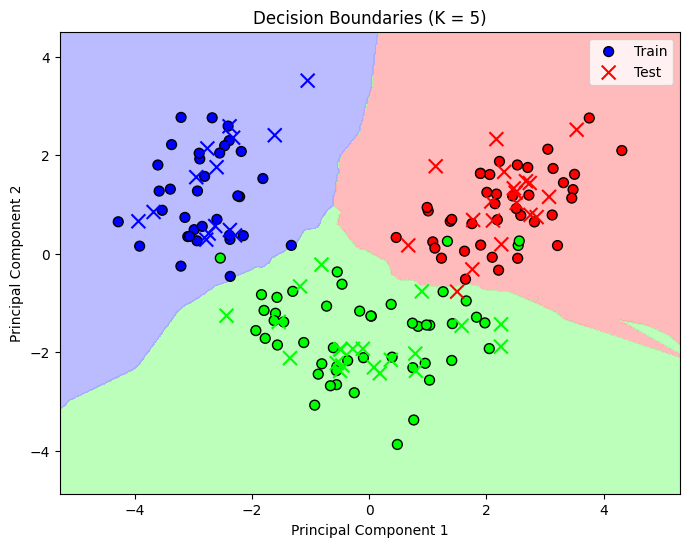

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Apply PCA to reduce the data to 2 features for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-reduced data into train/test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train KNN classifier on the reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and the data points
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Plot the decision boundaries
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# Plot the training points
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_points, edgecolor='k', marker='o', s=50, label='Train')
# Plot the testing points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_points, edgecolor='k', marker='x', s=100, label='Test')

plt.title("Decision Boundaries (K = 5)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
